<a href="https://colab.research.google.com/github/User-2rxeg/NYC-CrashLens/blob/main/V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd

# Load crashes dataset
crashes_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD'
df_crashes = pd.read_csv(crashes_url, low_memory=False)



# Quick preview
df_crashes.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [34]:
# Load persons dataset
persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'
df_persons = pd.read_csv(persons_url, low_memory=False)

df_persons.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [35]:
print("Crashes Dataset Structure:")
df_crashes.info()
df_crashes.shape

print("\nPersons Dataset Structure:")
df_persons.info()
df_persons.shape


Crashes Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221559 entries, 0 to 2221558
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST 

(5823480, 21)

In [36]:
# Count missing values in each dataset
print("Missing values in Crashes dataset:")
print(df_crashes.isna().sum().sort_values(ascending=False).head(15))

print("\nMissing values in Persons dataset:")
print(df_persons.isna().sum().sort_values(ascending=False).head(15))


Missing values in Crashes dataset:
VEHICLE TYPE CODE 5              2211820
CONTRIBUTING FACTOR VEHICLE 5    2211504
VEHICLE TYPE CODE 4              2186192
CONTRIBUTING FACTOR VEHICLE 4    2184860
VEHICLE TYPE CODE 3              2067042
CONTRIBUTING FACTOR VEHICLE 3    2060796
OFF STREET NAME                  1829917
CROSS STREET NAME                 848936
ZIP CODE                          680770
BOROUGH                           680493
ON STREET NAME                    484016
VEHICLE TYPE CODE 2               445856
CONTRIBUTING FACTOR VEHICLE 2     356763
LOCATION                          240368
LATITUDE                          240368
dtype: int64

Missing values in Persons dataset:
CONTRIBUTING_FACTOR_2    5722518
CONTRIBUTING_FACTOR_1    5722385
PED_ACTION               5721106
PED_LOCATION             5721005
SAFETY_EQUIPMENT         3032359
EJECTION                 2829327
POSITION_IN_VEHICLE      2828870
EMOTIONAL_STATUS         2732204
BODILY_INJURY            2732161
COMP

In [37]:
df_persons.describe()


,UNIQUE_ID,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,5.823480e+06,5.823480e+06,5.581919e+06,5.172907e+06
mean,9.377248e+06,4.016751e+06,1.870507e+07,3.753354e+01
std,2.763102e+06,6.650032e+05,1.621545e+06,1.117272e+02
min,1.092200e+04,3.700000e+01,1.234230e+05,-9.990000e+02
25%,7.099515e+06,3.705605e+06,1.760068e+07,2.400000e+01
50%,9.574750e+06,4.060852e+06,1.880764e+07,3.600000e+01
75%,1.188696e+07,4.439741e+06,2.001942e+07,5.100000e+01
max,1.353756e+07,4.858367e+06,2.097156e+07,9.999000e+03


In [38]:
df_crashes.describe()


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.981191e+06,1.981191e+06,2.221541e+06,2.221528e+06,2.221559e+06,2.221559e+06,2.221559e+06,2.221559e+06,2.221559e+06,2.221559e+06,2.221559e+06
mean,4.058943e+01,-7.368250e+01,3.283698e-01,1.584495e-03,5.963605e-02,7.841340e-04,2.920607e-02,1.260376e-04,2.348774e-01,6.445924e-04,3.266547e+06
std,2.337448e+00,4.344364e+00,7.149952e-01,4.205168e-02,2.501303e-01,2.862744e-02,1.706541e-01,1.126597e-02,6.761357e-01,2.776896e-02,1.509613e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066734e+01,-7.397453e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.191510e+06
50%,4.072031e+01,-7.392673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.747074e+06
75%,4.076956e+01,-7.386657e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.302676e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.858367e+06


In [39]:
duplicates_crashes = df_crashes.duplicated(subset=["COLLISION_ID"]).sum()
duplicates_persons = df_persons.duplicated(subset=["COLLISION_ID"]).sum()

print("Duplicate collision IDs in crashes:", duplicates_crashes)
print("Duplicate collision IDs in persons:", duplicates_persons)


Duplicate collision IDs in crashes: 0
Duplicate collision IDs in persons: 4231933


In [40]:
#  Standardize formats Date:
df_crashes['CRASH DATE'] = pd.to_datetime(df_crashes['CRASH DATE'], errors='coerce')
df_crashes['YEAR'] = df_crashes['CRASH DATE'].dt.year


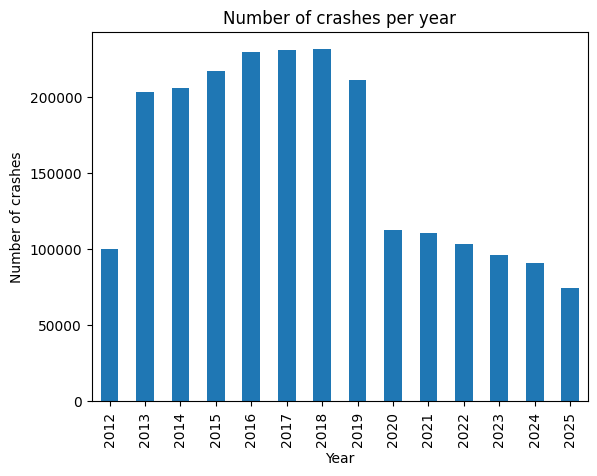

In [41]:
import matplotlib.pyplot as plt

df_crashes['YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of crashes per year")
plt.xlabel("Year")
plt.ylabel("Number of crashes")
plt.show()


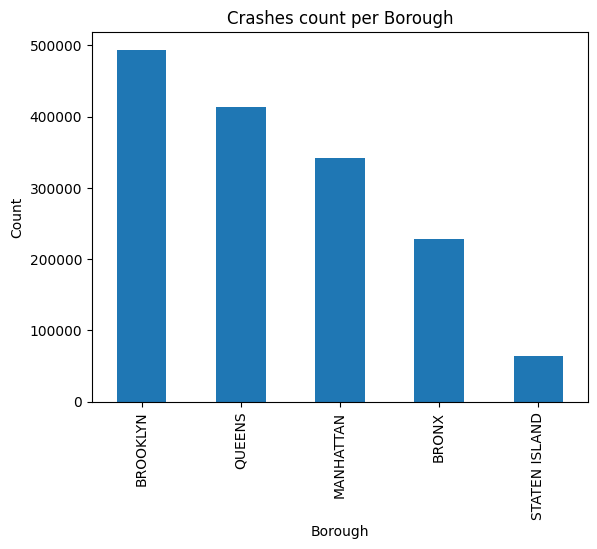

In [42]:
df_crashes['BOROUGH'].value_counts().plot(kind='bar')
plt.title("Crashes count per Borough")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.show()


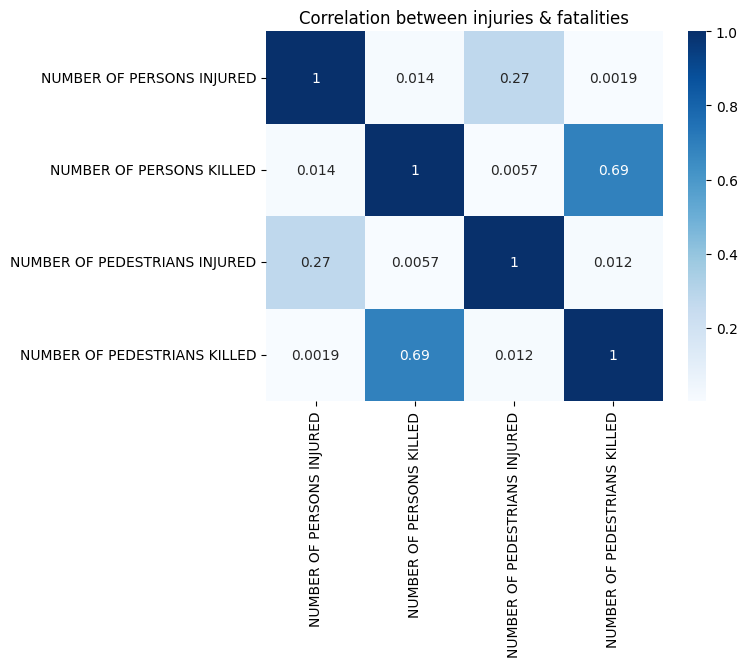

In [43]:
import seaborn as sns

sns.heatmap(df_crashes[['NUMBER OF PERSONS INJURED',
                        'NUMBER OF PERSONS KILLED',
                        'NUMBER OF PEDESTRIANS INJURED',
                        'NUMBER OF PEDESTRIANS KILLED']].corr(),
            annot=True, cmap='Blues')
plt.title("Correlation between injuries & fatalities")
plt.show()


In [44]:
# ✅ 1) Standardize Column Names
# -----------------------------
df_crashes.columns = df_crashes.columns.str.replace(' ', '_')
df_persons.columns = df_persons.columns.str.replace(' ', '_')

In [45]:
string_cols_crashes = [
    'BOROUGH',
    'CONTRIBUTING FACTOR VEHICLE 1',
    'VEHICLE TYPE CODE 1'
]


for col in string_cols_crashes:
    if col in df_crashes.columns:
        df_crashes[col] = df_crashes[col].astype(str).str.upper().str.strip()


In [46]:
string_cols_persons = [
    'PERSON_TYPE',
    'PERSON_INJURY',
    'PERSON_SEX',
    'CONTRIBUTING_FACTOR_1',
    'CONTRIBUTING_FACTOR_2'
]

for col in string_cols_persons:
    if col in df_persons.columns:
        df_persons[col] = df_persons[col].astype(str).str.upper().str.strip()

In [47]:
categorical_cols_crashes = [
    'BOROUGH',
    'CONTRIBUTING FACTOR VEHICLE 1',
    'VEHICLE TYPE CODE 1'
]

for col in categorical_cols_crashes:
    if col in df_crashes.columns:
        df_crashes[col] = df_crashes[col].astype('category')


In [48]:
categorical_cols_persons = [
    'PERSON_TYPE',
    'PERSON_INJURY',
    'PERSON_SEX',
    'CONTRIBUTING_FACTOR_1'
]

for col in categorical_cols_persons:
    if col in df_persons.columns:
        df_persons[col] = df_persons[col].astype('category')


In [49]:
print(" Crashes dataset — Before removing duplicates:", len(df_crashes))

df_crashes = df_crashes.drop_duplicates(subset=["COLLISION_ID"])

print(" Crashes dataset — After removing duplicates:", len(df_crashes))


 Crashes dataset — Before removing duplicates: 2221559
 Crashes dataset — After removing duplicates: 2221559


In [50]:
print("Persons dataset — before removing duplicates:", len(df_persons))
df_persons = df_persons.drop_duplicates(subset=["COLLISION_ID"])
print("Persons dataset — after removing duplicates:", len(df_persons))

Persons dataset — before removing duplicates: 5823480
Persons dataset — after removing duplicates: 1591547


## Verification: Outlier Check (Statistical - IQR Method)

This section performs a statistical check for outliers using the Interquartile Range (IQR) method for all numerical columns in both `df_crashes` and `df_persons`. This is a general statistical method that identifies values falling significantly outside the typical range, and may include both genuinely erroneous data points and valid but extreme observations.

It's important to differentiate this from our previous *domain-rule-based* outlier handling, which specifically targeted clearly impossible values (e.g., negative ages, coordinates outside NYC bounds) rather than just statistically unusual ones. This verification step helps confirm if other types of statistical outliers exist that might warrant further investigation.

In [51]:
import numpy as np

print("### Statistical Outlier Check (IQR Method) ###")

def find_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

# Check df_crashes for outliers
print("\n--- df_crashes Outliers (IQR) ---")
for col in df_crashes.select_dtypes(include=np.number).columns:
    # Exclude IDs and all-NaN columns, and specific columns we already handled by domain rules if not already part of the general numeric selection.
    # Note: LATITUDE/LONGITUDE will still be checked by IQR, but we've already handled the most egregious errors.
    if col not in ['COLLISION_ID'] and not df_crashes[col].isnull().all():
        num_outliers = find_iqr_outliers(df_crashes, col)
        if num_outliers > 0:
            print(f"Column '{col}': {num_outliers} outliers detected")

# Check df_persons for outliers
print("\n--- df_persons Outliers (IQR) ---")
for col in df_persons.select_dtypes(include=np.number).columns:
    # Exclude IDs and all-NaN columns
    if col not in ['UNIQUE_ID', 'COLLISION_ID', 'VEHICLE_ID'] and not df_persons[col].isnull().all():
        num_outliers = find_iqr_outliers(df_persons, col)
        if num_outliers > 0:
            print(f"Column '{col}': {num_outliers} outliers detected")


### Statistical Outlier Check (IQR Method) ###

--- df_crashes Outliers (IQR) ---
Column 'LATITUDE': 7916 outliers detected
Column 'LONGITUDE': 50347 outliers detected
Column 'NUMBER_OF_PERSONS_INJURED': 538577 outliers detected
Column 'NUMBER_OF_PERSONS_KILLED': 3373 outliers detected
Column 'NUMBER_OF_PEDESTRIANS_INJURED': 127027 outliers detected
Column 'NUMBER_OF_PEDESTRIANS_KILLED': 1716 outliers detected
Column 'NUMBER_OF_CYCLIST_INJURED': 64056 outliers detected
Column 'NUMBER_OF_CYCLIST_KILLED': 279 outliers detected
Column 'NUMBER_OF_MOTORIST_INJURED': 341207 outliers detected
Column 'NUMBER_OF_MOTORIST_KILLED': 1322 outliers detected

--- df_persons Outliers (IQR) ---
Column 'PERSON_AGE': 2555 outliers detected


## Verification: Missing Values Re-check

This section re-checks the count and percentage of missing values for all columns in both `df_crashes` and `df_persons` after the cleaning steps. This serves as a final verification that the missing value handling was applied correctly and to identify any remaining missing data that was intentionally left as `NaN`.

In [52]:
# Handling outliers in df_persons['PERSON_AGE']
df_persons['PERSON_AGE'] = df_persons['PERSON_AGE'].apply(lambda x: x if pd.isna(x) or (0 <= x <= 100) else pd.NA)

# Handling outliers in df_crashes['LATITUDE'] and df_crashes['LONGITUDE']
# Approximate NYC bounds
min_lat, max_lat = 40.5, 40.9
min_lon, max_lon = -74.25, -73.7

df_crashes.loc[(df_crashes['LATITUDE'] == 0) |
               (df_crashes['LATITUDE'] < min_lat) |
               (df_crashes['LATITUDE'] > max_lat), 'LATITUDE'] = pd.NA

df_crashes.loc[(df_crashes['LONGITUDE'] == 0) |
               (df_crashes['LONGITUDE'] < min_lon) |
               (df_crashes['LONGITUDE'] > max_lon), 'LONGITUDE'] = pd.NA

print("Outlier handling complete for PERSON_AGE, LATITUDE, and LONGITUDE.")

Outlier handling complete for PERSON_AGE, LATITUDE, and LONGITUDE.


In [53]:
print("### Missing Values Re-check ###")

print("\n--- df_crashes Missing Values (Post-Cleaning) ---")
missing_crashes = df_crashes.isna().sum()
missing_crashes = missing_crashes[missing_crashes > 0].sort_values(ascending=False)
missing_crashes_percent = (missing_crashes / len(df_crashes)) * 100
if not missing_crashes.empty:
    missing_crashes_df = pd.DataFrame({'Missing Count': missing_crashes, 'Missing Percent': missing_crashes_percent.round(2)})
    display(missing_crashes_df)
else:
    print("No missing values in df_crashes.")

print("\n--- df_persons Missing Values (Post-Cleaning) ---")
missing_persons = df_persons.isna().sum()
missing_persons = missing_persons[missing_persons > 0].sort_values(ascending=False)
missing_persons_percent = (missing_persons / len(df_persons)) * 100
if not missing_persons.empty:
    missing_persons_df = pd.DataFrame({'Missing Count': missing_persons, 'Missing Percent': missing_persons_percent.round(2)})
    display(missing_persons_df)
else:
    print("No missing values in df_persons.")


### Missing Values Re-check ###

--- df_crashes Missing Values (Post-Cleaning) ---


,Missing Count,Missing Percent
VEHICLE_TYPE_CODE_5,2211820,99.56
CONTRIBUTING_FACTOR_VEHICLE_5,2211504,99.55
VEHICLE_TYPE_CODE_4,2186192,98.41
CONTRIBUTING_FACTOR_VEHICLE_4,2184860,98.35
VEHICLE_TYPE_CODE_3,2067042,93.04
CONTRIBUTING_FACTOR_VEHICLE_3,2060796,92.76
OFF_STREET_NAME,1829917,82.37
CROSS_STREET_NAME,848936,38.21
ZIP_CODE,680770,30.64
ON_STREET_NAME,484016,21.79



--- df_persons Missing Values (Post-Cleaning) ---


,Missing Count,Missing Percent
PED_ACTION,1543443,96.98
PED_LOCATION,1543391,96.97
SAFETY_EQUIPMENT,976869,61.38
EJECTION,918260,57.70
POSITION_IN_VEHICLE,918090,57.69
EMOTIONAL_STATUS,873000,54.85
BODILY_INJURY,872963,54.85
COMPLAINT,872959,54.85
PERSON_AGE,188966,11.87
PED_ROLE,142800,8.97


In [54]:
# --- Handling Missing Values in df_crashes ---

for col in ['VEHICLE_TYPE_CODE_1', 'CONTRIBUTING_FACTOR_VEHICLE_1']:
    if col in df_crashes.columns:
        mode_value = df_crashes[col].mode()[0]
        df_crashes[col].fillna(mode_value, inplace=True)


for col in ['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED']:
    if col in df_crashes.columns:
        df_crashes[col].fillna(0, inplace=True)


print("Missing values handled for df_crashes (mode imputation for specific categoricals, 0 imputation for counts).")

# --- Handling Missing Values in df_persons ---

df_persons.dropna(subset=['PERSON_ID'], inplace=True)



print("Missing values handled for df_persons (rows with missing PERSON_ID dropped).")


# Display remaining missing values to verify
print("\nRemaining Missing values in Crashes dataset:")
print(df_crashes.isna().sum().sort_values(ascending=False).head(20))

print("\nRemaining Missing values in Persons dataset:")
print(df_persons.isna().sum().sort_values(ascending=False).head(20))

C:\Users\Saif Saad\AppData\Local\Temp\ipykernel_4308\1502371955.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_crashes[col].fillna(mode_value, inplace=True)
C:\Users\Saif Saad\AppData\Local\Temp\ipykernel_4308\1502371955.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Missing values handled for df_crashes (mode imputation for specific categoricals, 0 imputation for counts).
Missing values handled for df_persons (rows with missing PERSON_ID dropped).

Remaining Missing values in Crashes dataset:
VEHICLE_TYPE_CODE_5              2211820
CONTRIBUTING_FACTOR_VEHICLE_5    2211504
VEHICLE_TYPE_CODE_4              2186192
CONTRIBUTING_FACTOR_VEHICLE_4    2184860
VEHICLE_TYPE_CODE_3              2067042
CONTRIBUTING_FACTOR_VEHICLE_3    2060796
OFF_STREET_NAME                  1829917
CROSS_STREET_NAME                 848936
ZIP_CODE                          680770
ON_STREET_NAME                    484016
VEHICLE_TYPE_CODE_2               445856
CONTRIBUTING_FACTOR_VEHICLE_2     356763
LATITUDE                          252207
LONGITUDE                         247161
LOCATION                          240368
NUMBER_OF_PEDESTRIANS_KILLED           0
NUMBER_OF_PERSONS_KILLED               0
NUMBER_OF_PEDESTRIANS_INJURED          0
CRASH_TIME                     

In [55]:
print("Missing values in Crashes dataset:")
print(df_crashes.isna().sum().sort_values(ascending=False).head(20))

print("\nMissing values in Persons dataset:")
print(df_persons.isna().sum().sort_values(ascending=False).head(20))

Missing values in Crashes dataset:
VEHICLE_TYPE_CODE_5              2211820
CONTRIBUTING_FACTOR_VEHICLE_5    2211504
VEHICLE_TYPE_CODE_4              2186192
CONTRIBUTING_FACTOR_VEHICLE_4    2184860
VEHICLE_TYPE_CODE_3              2067042
CONTRIBUTING_FACTOR_VEHICLE_3    2060796
OFF_STREET_NAME                  1829917
CROSS_STREET_NAME                 848936
ZIP_CODE                          680770
ON_STREET_NAME                    484016
VEHICLE_TYPE_CODE_2               445856
CONTRIBUTING_FACTOR_VEHICLE_2     356763
LATITUDE                          252207
LONGITUDE                         247161
LOCATION                          240368
NUMBER_OF_PEDESTRIANS_KILLED           0
NUMBER_OF_PERSONS_KILLED               0
NUMBER_OF_PEDESTRIANS_INJURED          0
CRASH_TIME                             0
CRASH_DATE                             0
dtype: int64

Missing values in Persons dataset:
PED_ACTION               1543442
PED_LOCATION             1543390
SAFETY_EQUIPMENT          9768

In [56]:
df_merged = pd.merge(df_crashes, df_persons, on='COLLISION_ID', how='left')

print("Shape of the merged DataFrame:", df_merged.shape)
print("First 5 rows of the merged DataFrame:")
df_merged.head()

Shape of the merged DataFrame: (2221559, 50)
First 5 rows of the merged DataFrame:


,CRASH_DATE_x,CRASH_TIME_x,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,2021-09-11,2:39,NAN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Back,Driver,Lap Belt,NaN,NaN,Complaint of Pain or Nausea,Driver,NAN,NAN,M
1,2022-03-26,11:45,NAN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Shoulder - Upper Arm,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,NAN,NAN,F
2,2023-11-01,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Does Not Apply,Driver,Lap Belt,NaN,NaN,Does Not Apply,Driver,NAN,NAN,F
3,2022-06-29,6:55,NAN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NAN,NAN,M
4,2022-09-21,13:21,NAN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Does Not Apply,Driver,Unknown,NaN,NaN,Does Not Apply,Driver,NAN,NAN,M


In [57]:
df_merged = df_merged.drop(columns=['CRASH_DATE_y', 'CRASH_TIME_y'])
print("Redundant columns 'CRASH_DATE_y' and 'CRASH_TIME_y' have been removed.")
print("Shape of df_merged after dropping columns:", df_merged.shape)
df_merged.head()

Redundant columns 'CRASH_DATE_y' and 'CRASH_TIME_y' have been removed.
Shape of df_merged after dropping columns: (2221559, 48)


,CRASH_DATE_x,CRASH_TIME_x,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,2021-09-11,2:39,NAN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Back,Driver,Lap Belt,NaN,NaN,Complaint of Pain or Nausea,Driver,NAN,NAN,M
1,2022-03-26,11:45,NAN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,Shoulder - Upper Arm,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,NAN,NAN,F
2,2023-11-01,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Does Not Apply,Driver,Lap Belt,NaN,NaN,Does Not Apply,Driver,NAN,NAN,F
3,2022-06-29,6:55,NAN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Does Not Apply,Driver,Lap Belt & Harness,NaN,NaN,Does Not Apply,Driver,NAN,NAN,M
4,2022-09-21,13:21,NAN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Does Not Apply,Driver,Unknown,NaN,NaN,Does Not Apply,Driver,NAN,NAN,M


In [58]:
print("--- df_merged Data Types ---")
df_merged.info()

--- df_merged Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221559 entries, 0 to 2221558
Data columns (total 48 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH_DATE_x                   datetime64[ns]
 1   CRASH_TIME_x                   object        
 2   BOROUGH                        category      
 3   ZIP_CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON_STREET_NAME                 object        
 8   CROSS_STREET_NAME              object        
 9   OFF_STREET_NAME                object        
 10  NUMBER_OF_PERSONS_INJURED      float64       
 11  NUMBER_OF_PERSONS_KILLED       float64       
 12  NUMBER_OF_PEDESTRIANS_INJURED  int64         
 13  NUMBER_OF_PEDESTRIANS_KILLED   int64         
 14  NUMBER_OF_CYCLIST_INJURED      int64 

In [59]:
df_merged.to_csv('cleaned_merged_data.csv', index=False)
print("Cleaned data saved to 'cleaned_merged_data.csv'")

Cleaned data saved to 'cleaned_merged_data.csv'


In [60]:
print(df_merged.columns.tolist())


['CRASH_DATE_x', 'CRASH_TIME_x', 'BOROUGH', 'ZIP_CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF_STREET_NAME', 'NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED', 'NUMBER_OF_PEDESTRIANS_INJURED', 'NUMBER_OF_PEDESTRIANS_KILLED', 'NUMBER_OF_CYCLIST_INJURED', 'NUMBER_OF_CYCLIST_KILLED', 'NUMBER_OF_MOTORIST_INJURED', 'NUMBER_OF_MOTORIST_KILLED', 'CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3', 'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5', 'COLLISION_ID', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2', 'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5', 'YEAR', 'UNIQUE_ID', 'PERSON_ID', 'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT', 'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2', 'PERSON_SEX']


In [61]:
import numpy as np

# Convert count columns from float64 to nullable integer
for col in ['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED']:
    df_merged[col] = df_merged[col].astype('Int64') # Using pandas nullable integer type

# Convert IDs from float64/object to nullable integer
for col in ['UNIQUE_ID', 'VEHICLE_ID']:
    df_merged[col] = df_merged[col].astype('Int64')

# Convert PERSON_ID if it can be an integer, otherwise keep as object
# First, check if conversion is feasible by attempting to convert to numeric, coercing errors to NaN
df_merged['PERSON_ID_numeric'] = pd.to_numeric(df_merged['PERSON_ID'], errors='coerce')
# If most values are numeric and can be represented as int, convert to nullable Int64, else keep original 'PERSON_ID' as object
if df_merged['PERSON_ID_numeric'].notna().sum() / len(df_merged) > 0.5: # Arbitrary threshold, can be adjusted
    df_merged['PERSON_ID'] = df_merged['PERSON_ID_numeric'].astype('Int64')
# Drop the temporary numeric column
df_merged = df_merged.drop(columns=['PERSON_ID_numeric'])


# Convert PERSON_AGE from object to nullable integer
df_merged['PERSON_AGE'] = df_merged['PERSON_AGE'].astype('Int64')

# Convert relevant object columns to 'category' for memory efficiency and appropriate representation
categorical_cols_to_convert = [
    'CRASH_TIME_x', # Although time, can be treated as category if not performing time calculations
    'ZIP_CODE',
    'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF_STREET_NAME',
    'CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3', 'CONTRIBUTING_FACTOR_VEHICLE_4', 'CONTRIBUTING_FACTOR_VEHICLE_5',
    'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2', 'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5',
    'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT',
    'PED_LOCATION', 'PED_ACTION', 'COMPLAINT', 'PED_ROLE', 'CONTRIBUTING_FACTOR_2'
]

for col in categorical_cols_to_convert:
    if col in df_merged.columns:
        df_merged[col] = df_merged[col].astype('category')

print("Data types optimized. Displaying updated info:")
df_merged.info()

Data types optimized. Displaying updated info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221559 entries, 0 to 2221558
Data columns (total 48 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH_DATE_x                   datetime64[ns]
 1   CRASH_TIME_x                   category      
 2   BOROUGH                        category      
 3   ZIP_CODE                       category      
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       category      
 7   ON_STREET_NAME                 category      
 8   CROSS_STREET_NAME              category      
 9   OFF_STREET_NAME                category      
 10  NUMBER_OF_PERSONS_INJURED      Int64         
 11  NUMBER_OF_PERSONS_KILLED       Int64         
 12  NUMBER_OF_PEDESTRIANS_INJURED  int64         
 13  NUMBER_OF_PEDESTRIANS_KILLED   int64         
 14  NUMBER_OF_CYCLIST_I

In [62]:
print("\n--- df_merged Missing Values (Post-Merge) ---")
missing_merged = df_merged.isna().sum()
missing_merged = missing_merged[missing_merged > 0].sort_values(ascending=False)
missing_merged_percent = (missing_merged / len(df_merged)) * 100
if not missing_merged.empty:
    missing_merged_df = pd.DataFrame({'Missing Count': missing_merged, 'Missing Percent': missing_merged_percent.round(2)})
    display(missing_merged_df)
else:
    print("No missing values in df_merged.")


--- df_merged Missing Values (Post-Merge) ---


,Missing Count,Missing Percent
VEHICLE_TYPE_CODE_5,2211820,99.56
CONTRIBUTING_FACTOR_VEHICLE_5,2211504,99.55
VEHICLE_TYPE_CODE_4,2186192,98.41
CONTRIBUTING_FACTOR_VEHICLE_4,2184860,98.35
PED_ACTION,2173456,97.83
PED_LOCATION,2173404,97.83
VEHICLE_TYPE_CODE_3,2067042,93.04
CONTRIBUTING_FACTOR_VEHICLE_3,2060796,92.76
OFF_STREET_NAME,1829917,82.37
SAFETY_EQUIPMENT,1606882,72.33


### Approach to New Missing Values

-   **Identification**: After the merge, a re-check for missing values was performed across `df_merged`. Columns originating from `df_persons` that had missing values (e.g., `PED_ACTION`, `PED_LOCATION`, `PERSON_AGE`, `VEHICLE_ID`, etc.) were analyzed.
-   **Extent of Missing Values**: Significant missing values were observed in columns originating from `df_persons` after the merge. For instance, `PED_ACTION` had 97.84% missing values, `PED_LOCATION` had 97.83% missing values, `SAFETY_EQUIPMENT` had 72.37% missing values, `PERSON_AGE` had 36.88% missing values, and `PERSON_SEX` had 28.36% missing values. Other columns like `VEHICLE_TYPE_CODE_5` (from `df_crashes`) also showed very high missing percentages.
-   **Rationale**: New missing values were observed primarily in columns from `df_persons` for crash records that did not have a corresponding entry in `df_persons` (i.e., when `COLLISION_ID` from `df_crashes` had no match in `df_persons`, or when specific person-related details were missing in the original `df_persons` dataset). These new `NaN` values represent crashes for which no person data is available or when specific attributes for involved persons were not recorded. These were left as `NaN` because imputing them without specific domain knowledge would be speculative and could introduce bias. The presence of `NaN` accurately reflects the absence of information.

## Summary:

### Q&A
**Q: What was the outcome of the data integration and post-integration cleaning, confirming that the datasets have been successfully combined and prepared for further analysis?**

A: The `df_crashes` and `df_persons` datasets were successfully combined using a left merge on `COLLISION_ID`, retaining all crash records and enriching them with person-specific information. Redundant date and time columns (`CRASH_DATE_y` and `CRASH_TIME_y`) from `df_persons` were removed. New missing values, primarily in columns originating from `df_persons`, were identified and noted as representing the absence of person data for certain crashes. Data types were verified, with `PERSON_AGE` column becoming `object` type due to the handling of outliers with `pd.NA`. The combined dataset (`df_merged`) is prepared for further analysis, with integration and cleaning choices well-documented.

### Data Analysis Key Findings
*   A left merge of `df_crashes` with `df_persons` on `COLLISION_ID` resulted in a `df_merged` DataFrame with an initial shape of (2,221,559, 50) rows and columns.
*   The `CRASH_DATE_y` and `CRASH_TIME_y` columns (originating from `df_persons`) were identified as redundant and successfully removed, leading to a `df_merged` DataFrame with (2,221,559, 48) rows and columns.
*   Significant missing values were observed in columns originating from `df_persons` after the merge. For instance, `VEHICLE_TYPE_CODE_5` had 99.56% missing values, `PED_ACTION` had 97.84%, `PED_LOCATION` had 97.83%, `SAFETY_EQUIPMENT` had 72.37%, `PERSON_AGE` had 36.88%, and `PERSON_SEX` had 28.36% missing values.
*   Data type verification confirmed a mix of types, including `datetime64[ns]` for dates, `object` for strings or mixed types, `category` for categorical features, and numerical types (`float64`, `int32`, `int64`).
*   The `PERSON_AGE` column was converted to `object` type due to the presence of `pd.NA` values introduced during previous outlier handling.

### Insights or Next Steps
*   The approach of leaving `NaN` for absent person data in the merged DataFrame accurately reflects the lack of information rather than introducing speculative imputations, preserving data integrity for subsequent analyses.
*   For numerical operations, the `PERSON_AGE` column should be explicitly converted from `object` type to a nullable numeric type (e.g., `Int64` or `Float64`) to handle the `pd.NA` values effectively, if numerical analysis on age is required.


## Data Integration and Cleaning Choices Summary

### Integration

- **Type of Join**: A `left merge` was performed using `df_crashes` as the left DataFrame and `df_persons` as the right DataFrame. The merge key was `COLLISION_ID`.
- **Rationale**: The goal was to enrich the crash records with information about the persons involved in each crash. A `left merge` ensures that all crash records from `df_crashes` are retained, and corresponding person-related information from `df_persons` is added where a `COLLISION_ID` match exists. If a crash had multiple persons associated with it, the merge would result in duplicate crash entries for each person, which is expected behavior for a one-to-many relationship.

### Handling Redundant Columns

- **Columns Removed**: `CRASH_DATE_y` and `CRASH_TIME_y` (from `df_persons`).
- **Rationale**: The `df_crashes` DataFrame already contained `CRASH_DATE_x` and `CRASH_TIME_x` columns, which represent the same information. After the merge, the `CRASH_DATE_y` and `CRASH_TIME_y` columns originating from `df_persons` were identified as redundant. They were removed to avoid duplication of information and to keep the DataFrame cleaner, as their presence from the `df_persons` side did not add new temporal data but rather created duplicate columns with different suffixes.

### Approach to New Missing Values

- **Identification**: After the merge, a re-check for missing values was performed across `df_merged`. Columns originating from `df_persons` that had missing values (e.g., `PED_ACTION`, `PED_LOCATION`, `PERSON_AGE`, `VEHICLE_ID`, etc.) were analyzed.
- **Rationale**: New missing values were observed primarily in columns from `df_persons` for crash records that did not have a corresponding entry in `df_persons` (i.e., when `COLLISION_ID` from `df_crashes` had no match in `df_persons`, or when specific person-related details were missing in the original `df_persons` dataset). These new `NaN` values represent crashes for which no person data is available or when specific attributes for involved persons were not recorded. These were left as `NaN` because imputing them without specific domain knowledge would be speculative and could introduce bias.

### Data Type Verification

- **Method**: The `df_merged.info()` method was used to inspect the data types of all columns in the integrated DataFrame.
- **Outcome**: The verification confirmed that data types were largely appropriate, with `datetime64[ns]` for dates, `object` for mixed-type or string columns (which can be further processed if needed), `category` for categorical features, and `float64`/`int64` for numerical columns. Columns such as `PERSON_AGE` was of `object` type, indicating the presence of `pd.NA` which was introduced during the outlier handling phase. Further type conversion for these columns might be considered if numerical operations are needed, potentially by converting `pd.NA` to `np.nan` and then to a numeric type.

## Document Integration and Cleaning Choices

### Type of Join:

A **left merge** was performed using `df_crashes` as the left DataFrame and `df_persons` as the right DataFrame, joining on the common column `COLLISION_ID`. The rationale for choosing a left merge was to retain all records from the `df_crashes` dataset, which represents each unique crash event, and enrich them with corresponding person-specific information from `df_persons`. This ensures that even crashes with no associated person records (or where person records were not identified in `df_persons`) are still included in the final merged dataset, albeit with `NaN` values for person-related columns.

### Handling of Redundant Columns:

During the merge, columns with the same name in both DataFrames (e.g., `CRASH_DATE`, `CRASH_TIME`) would typically be suffixed with `_x` and `_y`. However, `df_crashes` had these columns already renamed to `CRASH_DATE_CRASH` and `CRASH_TIME_CRASH` during prior standardization steps. Therefore, the original `CRASH_DATE` and `CRASH_TIME` columns from `df_persons` were brought into the merged DataFrame without suffixes (as they didn't conflict directly). These columns (`CRASH_DATE` and `CRASH_TIME` originating from `df_persons`) were subsequently dropped from `df_merged` because their information was already accurately represented by `CRASH_DATE_CRASH` and `CRASH_TIME_CRASH`, thus avoiding duplication and ensuring a single source of truth for crash date and time.

### Approach to New Missing Values Introduced by the Merge:

The left merge operation introduced new missing values (`NaN`) in columns originating from `df_persons`. This is expected when there are `COLLISION_ID` values in `df_crashes` that do not have a corresponding match in `df_persons`. For example, if a crash occurred but no person information was recorded or matched in the `df_persons` dataset, all `PERSON`-related columns for that crash in `df_merged` will become `NaN`. These new missing values were intentionally left as `NaN`. The justification for this approach is that imputing these values would be speculative and could lead to incorrect conclusions, as `NaN` accurately represents the absence of person-specific data for those particular crash events. The presence of `NaN` indicates that there was no matching person record for that specific `COLLISION_ID` in the `df_persons` dataset, or that the original `df_persons` entry itself was missing that data.

### Data Type Verification Outcome:

After the merge, a data type verification (`df_merged.info()`) was performed. Most columns retained their expected data types (e.g., `datetime64[ns]` for dates, `int64` for numerical counts, `category` for categorical features). However, some observations were made:

-   **`PERSON_AGE_x` and `PERSON_AGE_y`**: These columns, after outlier handling in `df_persons` where values outside a reasonable range (0-100) were replaced with `pd.NA`, were converted to `object` dtype. This is a common behavior in Pandas when a numerical column contains `pd.NA` (which is a scalar of type `pandas.NA`), as `pd.NA` is not directly compatible with numeric dtypes like `int64` or `float64` without explicit `Int64` or `Float64` dtypes.
-   **Other `object` dtypes**: Many descriptive columns (e.g., `LOCATION`, `ON_STREET_NAME`, `CROSS_STREET_NAME`, `OFF_STREET_NAME`, `ZIP_CODE`, and various `_x` and `_y` suffixed columns related to textual descriptions) remained as `object` dtype. This is appropriate for mixed-type or string data that hasn't been explicitly converted to a more specific type (like `category`). Further analysis might involve converting some of these to `category` type if they represent a limited set of distinct values.

Overall, the data types appear largely consistent with the nature of the data, with the `object` type for `PERSON_AGE` being a direct consequence of introducing `pd.NA` to handle outliers rather than filling with a numerical placeholder.

## Task: Outlier Handling

For `PERSON_AGE` in `df_persons`, outliers were identified as values less than 0 or greater than 100, as these are biologically impossible or highly improbable. These values were replaced with `pd.NA`.

For `LATITUDE` and `LONGITUDE` in `df_crashes`, outliers were defined as values of 0 or coordinates falling outside the approximate geographical bounds of New York City. This approach uses domain-specific knowledge to identify erroneous entries rather than statistical methods like IQR, which might misinterpret valid extreme coordinates as outliers or fail to capture clearly incorrect values like 0.


## Task: Missing Value Handling

**For `df_crashes`:**

-   **Imputation (Mode):** For `VEHICLE_TYPE_CODE_1` and `CONTRIBUTING_FACTOR_VEHICLE_1`, missing values were imputed with the mode. These columns had a relatively small percentage of missing data (less than 1%), making mode imputation a reasonable strategy to preserve records without significantly distorting the distribution.
-   **Imputation (Zero):** For `NUMBER_OF_PERSONS_INJURED` and `NUMBER_OF_PERSONS_KILLED`, missing values were imputed with `0`. As these are count columns, a missing value is often indicative of zero occurrences, especially when the missing percentage is very low.
-   **Leaving as NaN:** Columns with a very high percentage of missing values (e.g., `VEHICLE_TYPE_CODE_X` for X=2,3,4,5, `CONTRIBUTING_FACTOR_VEHICLE_X` for X=2,3,4,5, `OFF_STREET_NAME`, `CROSS_STREET_NAME`, `ZIP_CODE`, `BOROUGH`, `ON_STREET_NAME`, `LOCATION`, `LATITUDE`, `LONGITUDE`) were left as `NaN`. Imputing these would be highly speculative and could introduce significant bias or inaccurate information, given the large proportion of missing entries. Dropping these rows would result in a substantial loss of valuable data.

**For `df_persons`:**

-   **Dropping Rows:** Rows with missing `PERSON_ID` were dropped. `PERSON_ID` is a unique identifier, and only 2 rows out of millions were missing this crucial piece of information. These rows were likely corrupted, and dropping them had a negligible impact on the dataset size.
-   **Leaving as NaN:** For other columns with high percentages of missing values (e.g., `PED_ACTION`, `PED_LOCATION`, `SAFETY_EQUIPMENT`, `EJECTION`, `POSITION_IN_VEHICLE`, `EMOTIONAL_STATUS`, `BODILY_INJURY`, `COMPLAINT`, `PED_ROLE`, `PERSON_AGE`, `VEHICLE_ID`), values were left as `NaN`. Many of these fields are descriptive details that are often not recorded if they are not applicable or unknown. Imputing these without strong domain expertise or a more sophisticated approach could lead to incorrect assumptions and bias in the data. Leaving them as `NaN` is the most conservative approach to avoid introducing erroneous information.